In [38]:
"""
- Data structure and quality
- Missing values patterns
- Content distribution
- Feature relationships
"""

'\n- Data structure and quality\n- Missing values patterns\n- Content distribution\n- Feature relationships\n'

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('default')
sns.set_palette("husl")

print("✓ Libraries imported successfully")

✓ Libraries imported successfully


In [40]:
df = pd.read_csv('../data/raw/Netflix_Dataset.csv')


print("NETFLIX DATASET LOADED")

print(f"Dataset shape: {df.shape[0]} rows × {df.shape[1]} columns")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# Display first few rows
df.head()

NETFLIX DATASET LOADED
Dataset shape: 7789 rows × 11 columns
Memory usage: 7.46 MB


,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [46]:
print("\nColumn Information:")
df.info()

print("\nColumn Names:")
for i, col in enumerate(df.columns, 1):
    print(f"{i}. {col}")

print("\nData Categorys:")
print(df.dtypes)


Column Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB

Column Names:
1. Show_Id
2. Category
3. Title
4. Director
5. Cast
6. Country
7. Release_Date
8. Rating
9. Duration
10. Type
11. Description

Data Categorys:
Show_Id         object
Category        object
Title           object
Director        object
Cast            object
Country   


Columns with Missing Values:
      Column  Missing_Count  Missing_Percentage
    Director           2388               30.66
        Cast            718                9.22
     Country            507                6.51
Release_Date             10                0.13
      Rating              7                0.09


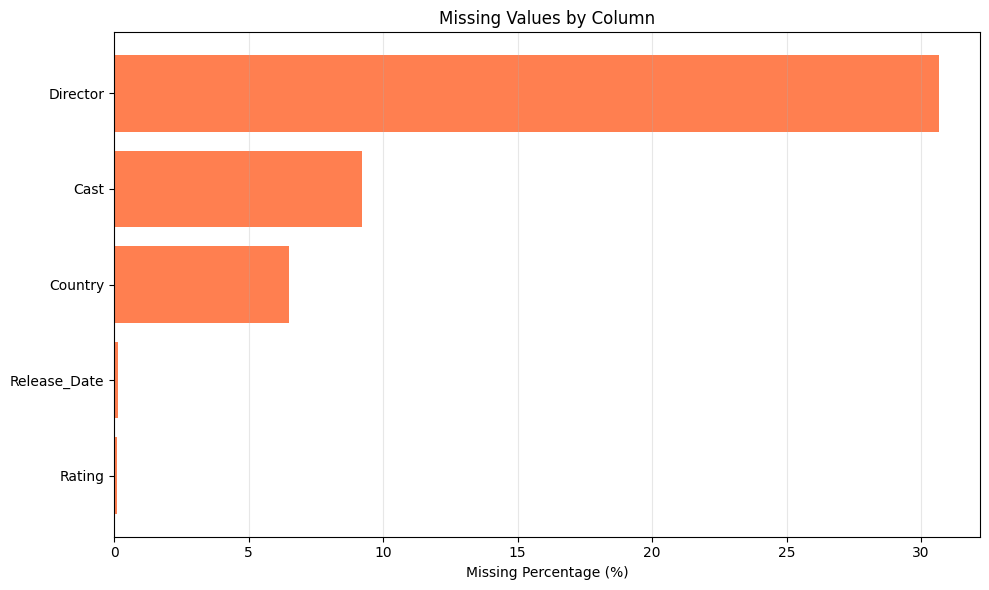

In [ ]:
# Calculate missing values
missing_data = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': df.isnull().sum(),
    'Missing_Percentage': (df.isnull().sum() / len(df) * 100).round(2)
})
missing_data = missing_data[missing_data['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)

print("\nColumns with Missing Values:")
print(missing_data.to_string(index=False))

# Visualize missing values
plt.figure(figsize=(10, 6))
missing_data_sorted = missing_data.sort_values('Missing_Percentage', ascending=True)
plt.barh(missing_data_sorted['Column'], missing_data_sorted['Missing_Percentage'], color='coral')
plt.xlabel('Missing Percentage (%)')
plt.title('Missing Values by Column')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()


Content Category Distribution:
Movie      5379
TV Show    2410
Name: Category, dtype: int64

Movies: 69.1%
TV Shows: 30.9%


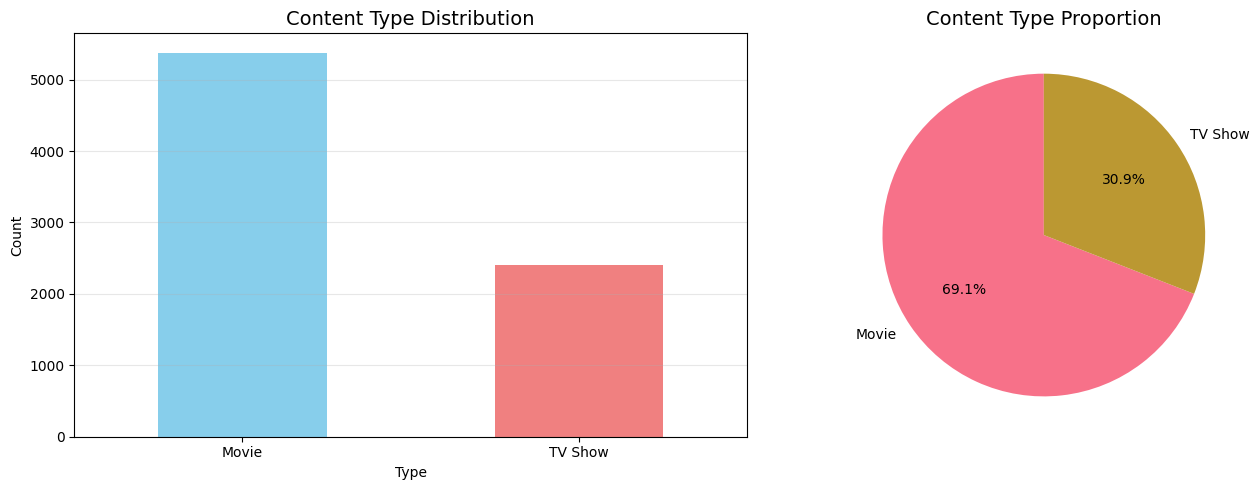

In [ ]:
# Count by Category
Category_counts = df['Category'].value_counts()
print("\nContent Category Distribution:")
print(Category_counts)
print(f"\nMovies: {Category_counts['Movie']/len(df)*100:.1f}%")
print(f"TV Shows: {Category_counts['TV Show']/len(df)*100:.1f}%")

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar chart
Category_counts.plot(kind='bar', ax=axes[0], color=['skyblue', 'lightcoral'])
axes[0].set_title('Content Category Distribution', fontsize=14)
axes[0].set_ylabel('Count')
axes[0].set_xlabel('Category')
axes[0].tick_params(axis='x', rotation=0)
axes[0].grid(axis='y', alpha=0.3)

# Pie chart
axes[1].pie(Category_counts.values, labels=Category_counts.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Content Category Proportion', fontsize=14)

plt.tight_layout()
plt.show()


Release Year Statistics:
count    7779.000000
mean     2018.493637
std         1.388082
min      2008.000000
25%      2018.000000
50%      2019.000000
75%      2020.000000
max      2021.000000
Name: release_year, dtype: float64

Oldest content: 2008
Newest content: 2021
Median year: 2019


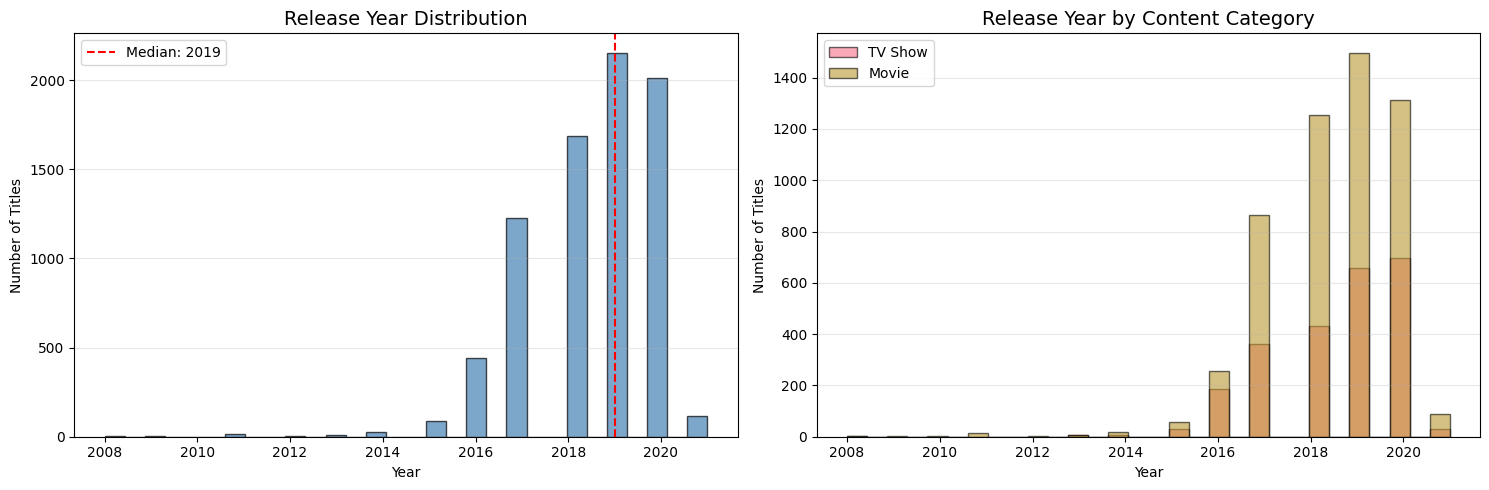

In [ ]:
# Convert Release_Date to year (numeric)
df['release_year'] = pd.to_datetime(df['Release_Date'], errors='coerce').dt.year

# Basic statistics
print("\nRelease Year Statistics:")
print(df['release_year'].describe())

print(f"\nOldest content: {int(df['release_year'].min())}")
print(f"Newest content: {int(df['release_year'].max())}")
print(f"Median year: {int(df['release_year'].median())}")

# Visualize release year distribution
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Histogram
axes[0].hist(df['release_year'].dropna(), bins=30, color='steelblue', alpha=0.7, edgecolor='black')
axes[0].set_title('Release Year Distribution', fontsize=14)
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Number of Titles')
axes[0].grid(axis='y', alpha=0.3)
axes[0].axvline(df['release_year'].median(), color='red', linestyle='--', label=f'Median: {df["release_year"].median():.0f}')
axes[0].legend()

# By Category
for content_Category in df['Category'].unique():
    Category_data = df[df['Category'] == content_Category]['release_year'].dropna()
    axes[1].hist(Category_data, bins=30, alpha=0.6, label=content_Category, edgecolor='black')

axes[1].set_title('Release Year by Content Category', fontsize=14)
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Number of Titles')
axes[1].legend()
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


RATING ANALYSIS

Top 10 Ratings:
TV-MA    50
TV-14    34
PG-13    28
R        23
TV-PG    22
TV-Y7    14
PG       13
TV-Y     10
TV-G      5
G         1
Name: rating, dtype: int64


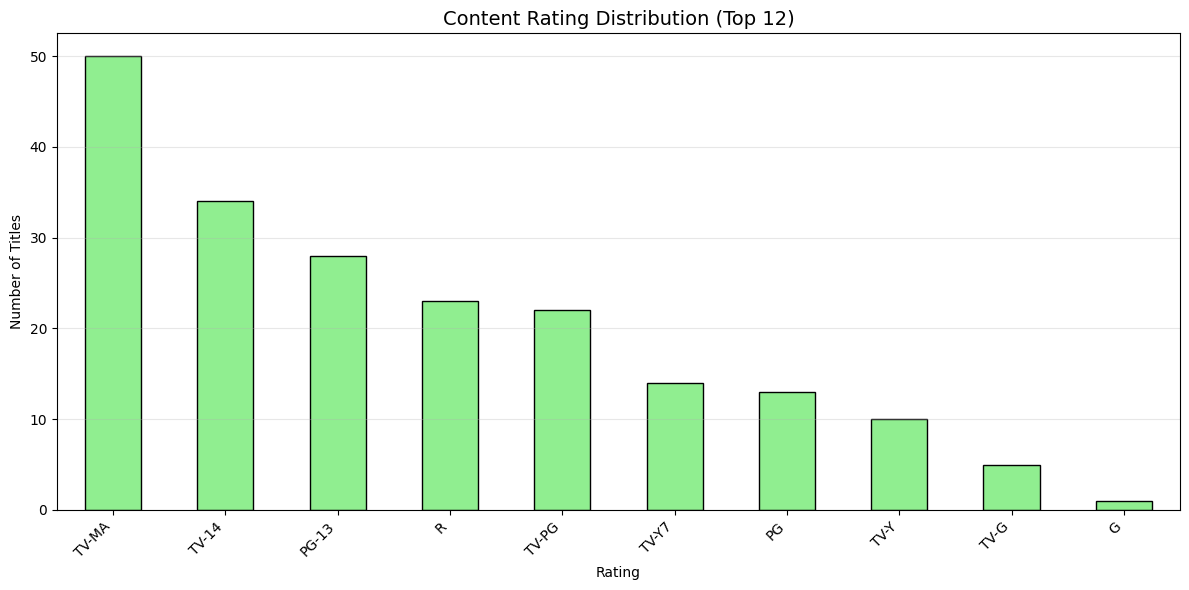


Rating Distribution by Content Type:
type    Movie  TV Show
rating                
G           1        0
PG         13        0
PG-13      28        0
R          23        0
TV-14      23       11
TV-G        1        4
TV-MA      19       31
TV-PG      14        8
TV-Y        3        7
TV-Y7       2       12


In [ ]:
print("\n" + "=" * 60)
print("RATING ANALYSIS")
print("=" * 60)

# Rating counts
rating_counts = df['rating'].value_counts()
print("\nTop 10 Ratings:")
print(rating_counts.head(10))

# Visualize
plt.figure(figsize=(12, 6))
rating_counts.head(12).plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Content Rating Distribution (Top 12)', fontsize=14)
plt.xlabel('Rating')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Rating by Category
print("\nRating Distribution by Content Category:")
rating_by_Category = pd.crosstab(df['rating'], df['Category'])
print(rating_by_Category.head(10))

GENRE ANALYSIS

Total unique genres: 38

Top 20 Genres:
Dramas                       45
International Movies         42
Comedies                     41
Action & Adventure           40
International TV Shows       31
Kids' TV                     22
TV Comedies                  20
Thrillers                    17
TV Dramas                    16
Romantic Movies              15
Children & Family Movies     15
Anime Features               12
Documentaries                12
Crime TV Shows               11
Reality TV                   10
Docuseries                   10
Music & Musicals              7
Classic Movies                6
Spanish-Language TV Shows     6
Sci-Fi & Fantasy              6
Name: listed_in, dtype: int64


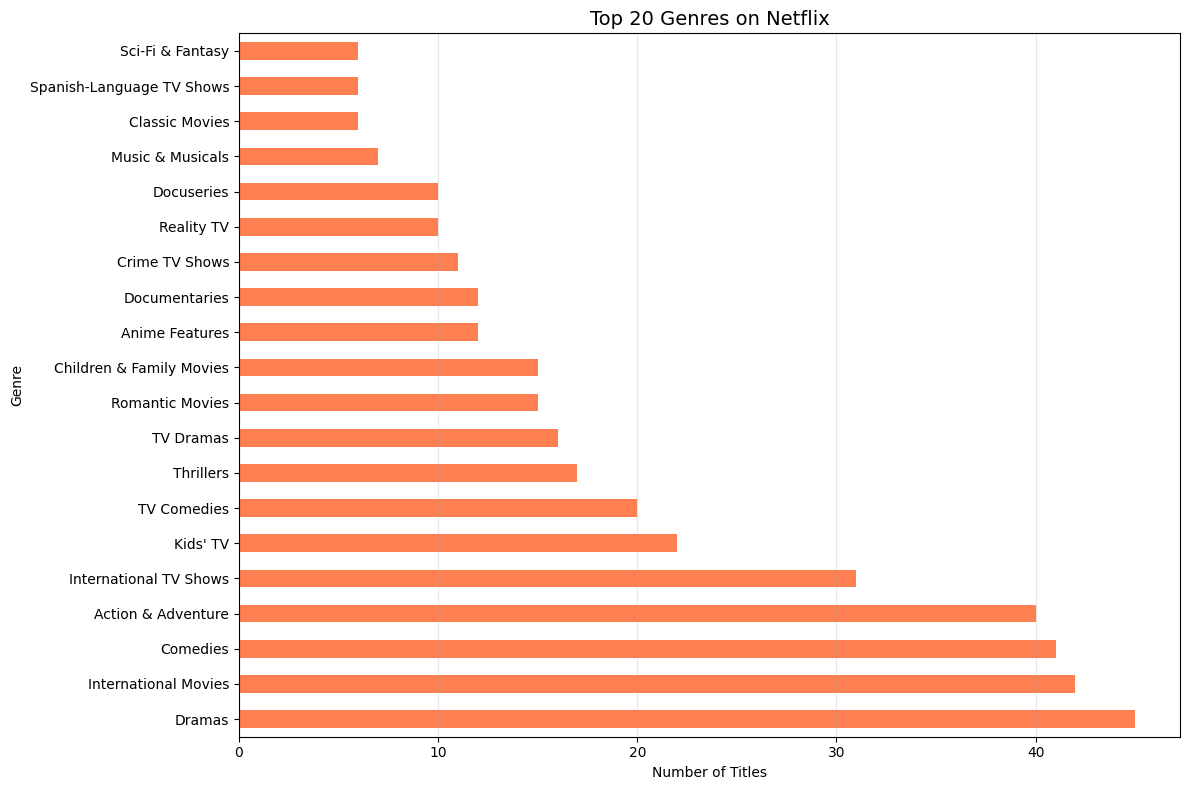

In [ ]:
print("GENRE ANALYSIS")

# Extract all genres
all_genres = df['listed_in'].dropna().str.split(',').explode().str.strip()
genre_counts = all_genres.value_counts()

print(f"\nTotal unique genres: {len(genre_counts)}")
print("\nTop 20 Genres:")
print(genre_counts.head(20))

# Visualize top genres
plt.figure(figsize=(12, 8))
genre_counts.head(20).plot(kind='barh', color='coral')
plt.title('Top 20 Genres on Netflix', fontsize=14)
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

COUNTRY ANALYSIS

Total unique countries: 29

Top 15 Countries:
United States     77
India             16
United Kingdom    16
Japan             16
France             7
Canada             6
Australia          6
Germany            5
Nigeria            4
South Africa       3
Hong Kong          3
Italy              3
South Korea        3
China              3
Mexico             2
Name: country, dtype: int64


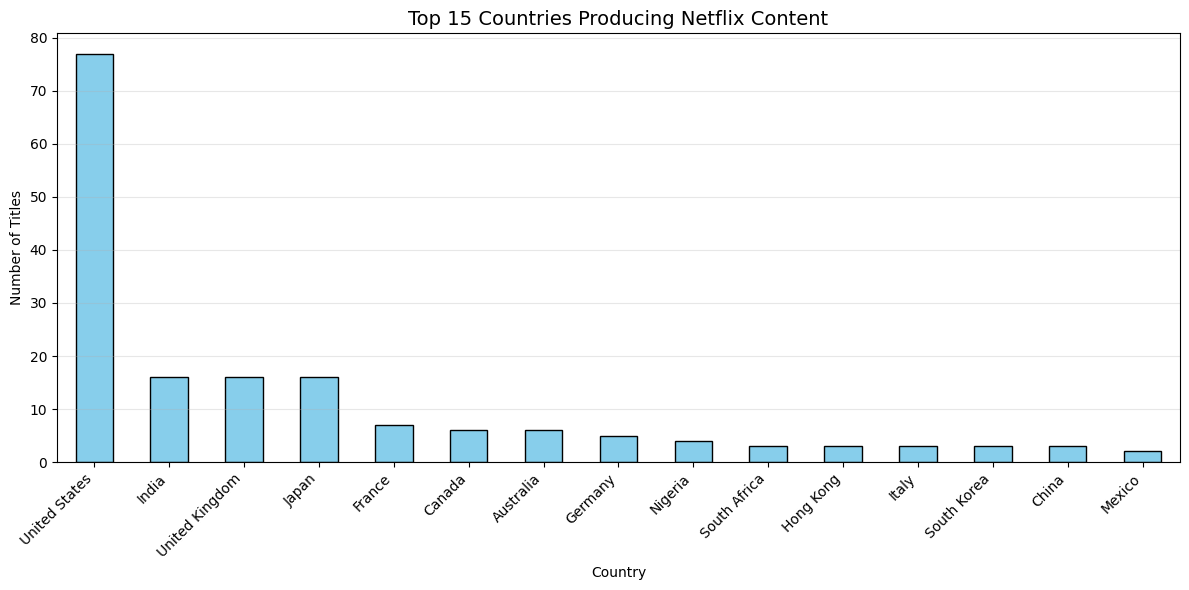

In [ ]:
print("COUNTRY ANALYSIS")

# Extract all countries
all_countries = df['country'].dropna().str.split(',').explode().str.strip()
country_counts = all_countries.value_counts()

print(f"\nTotal unique countries: {len(country_counts)}")
print("\nTop 15 Countries:")
print(country_counts.head(15))

# Visualize
plt.figure(figsize=(12, 6))
country_counts.head(15).plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 15 Countries Producing Netflix Content', fontsize=14)
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

DURATION ANALYSIS

Duration column sample:
1 Season     43
2 Seasons    13
95 min        7
97 min        5
3 Seasons     5
106 min       5
94 min        5
91 min        4
5 Seasons     4
96 min        3
Name: duration, dtype: int64

Movie Duration Statistics (minutes):
count    127.000000
mean     106.275591
std       25.864015
min       13.000000
25%       94.000000
50%      103.000000
75%      117.500000
max      229.000000
Name: duration_minutes, dtype: float64

TV Show Seasons Statistics:
count    73.000000
mean      2.082192
std       1.831464
min       1.000000
25%       1.000000
50%       1.000000
75%       2.000000
max       9.000000
Name: seasons, dtype: float64


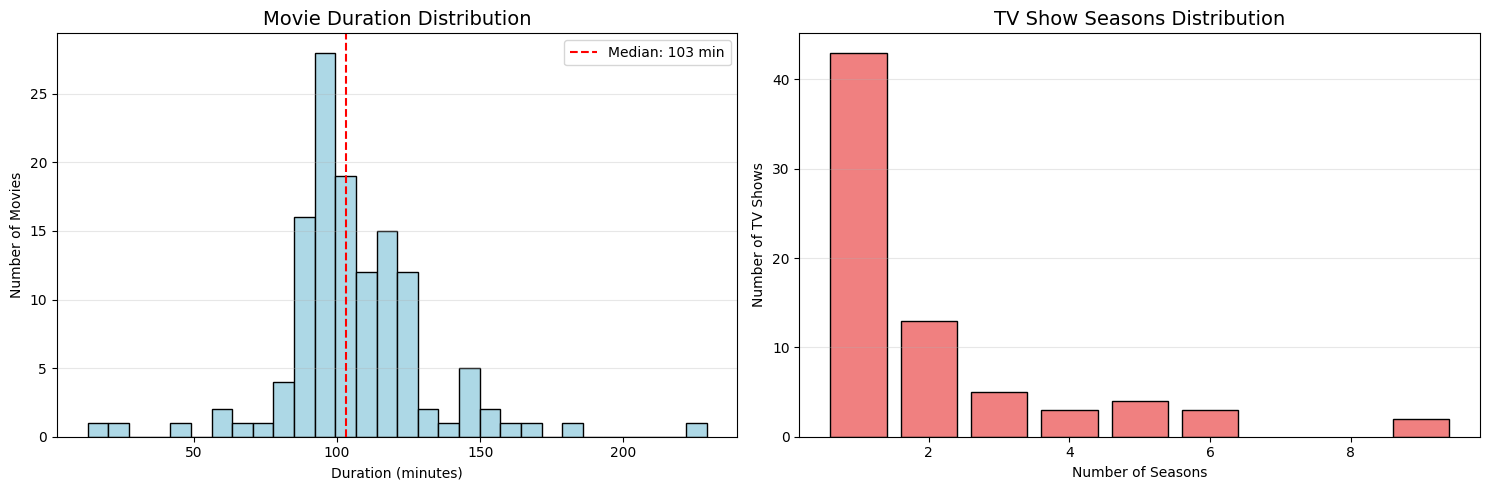

In [ ]:
print("DURATION ANALYSIS")

# Analyze duration patterns
print("\nDuration column sample:")
print(df['duration'].value_counts().head(10))

# Separate movies and TV shows duration
movies = df[df['Category'] == 'Movie'].copy()
tv_shows = df[df['Category'] == 'TV Show'].copy()

# Extract numeric duration for movies (minutes)
movies['duration_minutes'] = movies['duration'].str.extract('(\d+)').asCategory(float)
print(f"\nMovie Duration Statistics (minutes):")
print(movies['duration_minutes'].describe())

# Extract seasons for TV shows
tv_shows['seasons'] = tv_shows['duration'].str.extract('(\d+)').asCategory(float)
print(f"\nTV Show Seasons Statistics:")
print(tv_shows['seasons'].describe())

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Movie duration
axes[0].hist(movies['duration_minutes'].dropna(), bins=30, color='lightblue', edgecolor='black')
axes[0].set_title('Movie Duration Distribution', fontsize=14)
axes[0].set_xlabel('Duration (minutes)')
axes[0].set_ylabel('Number of Movies')
axes[0].axvline(movies['duration_minutes'].median(), color='red', linestyle='--', 
                label=f'Median: {movies["duration_minutes"].median():.0f} min')
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

# TV show seasons
season_counts = tv_shows['seasons'].value_counts().sort_index()
axes[1].bar(season_counts.index, season_counts.values, color='lightcoral', edgecolor='black')
axes[1].set_title('TV Show Seasons Distribution', fontsize=14)
axes[1].set_xlabel('Number of Seasons')
axes[1].set_ylabel('Number of TV Shows')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

CONTENT ADDITION TRENDS

Content Added Per Year:
year_added
2021    200
dtype: int64


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (12,) and arg 1 with shape (2,).

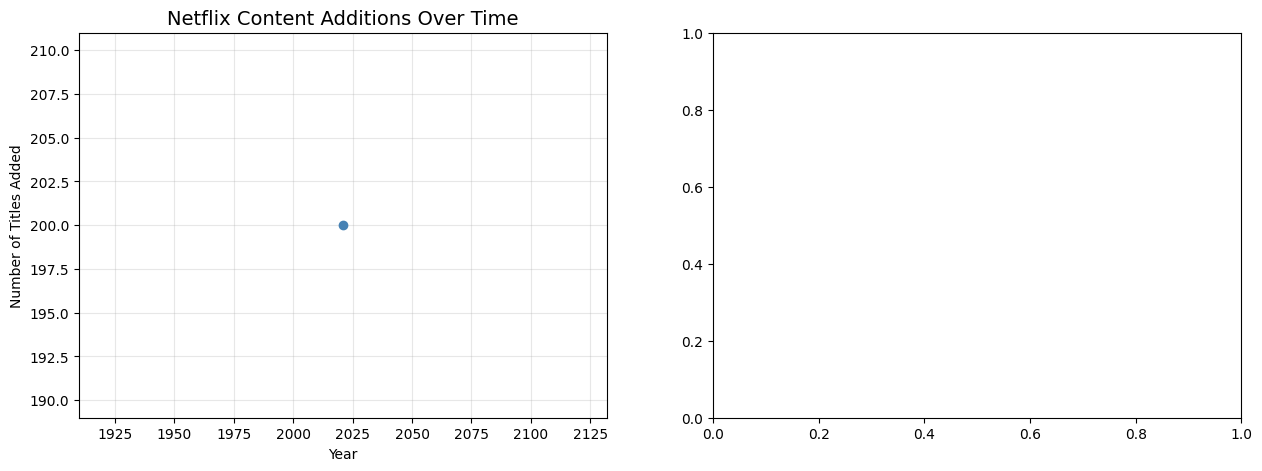

In [ ]:
print("CONTENT ADDITION TRENDS")

# Parse date_added
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

# Content added by year
yearly_additions = df.groupby('year_added').size()
print("\nContent Added Per Year:")
print(yearly_additions.tail(10))

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Yearly additions
yearly_additions.plot(kind='line', ax=axes[0], marker='o', color='steelblue', linewidth=2)
axes[0].set_title('Netflix Content Additions Over Time', fontsize=14)
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Number of Titles Added')
axes[0].grid(True, alpha=0.3)

# Monthly pattern
monthly_additions = df.groupby('month_added').size()
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
axes[1].bar(range(1, 13), monthly_additions, color='coral', edgecolor='black')
axes[1].set_title('Content Additions by Month', fontsize=14)
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Number of Titles')
axes[1].set_xticks(range(1, 13))
axes[1].set_xticklabels(months, rotation=45)
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
exploration_results = {
    'total_titles': len(df),
    'movies': len(df[df['Category'] == 'Movie']),
    'tv_shows': len(df[df['Category'] == 'TV Show']),
    'unique_genres': len(genre_counts),
    'unique_countries': len(country_counts),
    'date_range': f"{df['Release_Date'].min()} - {df['Release_Date'].max()}",
    'missing_director_pct': (df['director'].isnull().sum() / len(df) * 100),
    'missing_cast_pct': (df['cast'].isnull().sum() / len(df) * 100)
}

print("\n✓ Data exploration completed!")
print("✓ Ready for preprocessing (Notebook 02)")